## UmojaHack Africa 2021 #3: Financial Resilience Challenge (BEGINNER) by UmojaHack Africa

Can you predict if an individual will be able to make a payment in an emergency situation?

The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient.


![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/151/thumb_cdf71374-9857-44bb-8216-5f8c67afb51f.png)

This is a simple Python starter notebook to get you started with the Financial Resilience Challenge.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')
variable_definations = pd.read_csv('VariableDefinitions.csv')

In [3]:
# Preview the first five rows of the train set
train.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [4]:
# Preview the first five rows of the test set
test.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,...,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [5]:
# Preview the first five rows of the sample submission file
samplesubmission.head()

,ID,target
0,ID_0000005111,NaN
1,ID_0000389416,NaN
2,ID_0000634789,NaN
3,ID_0000778100,NaN
4,ID_0001123210,NaN


In [6]:
# Preview variable definations
variable_definations

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [7]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (104867, 36)
The shape of the test set is: (44943, 35)


### Check for missing values

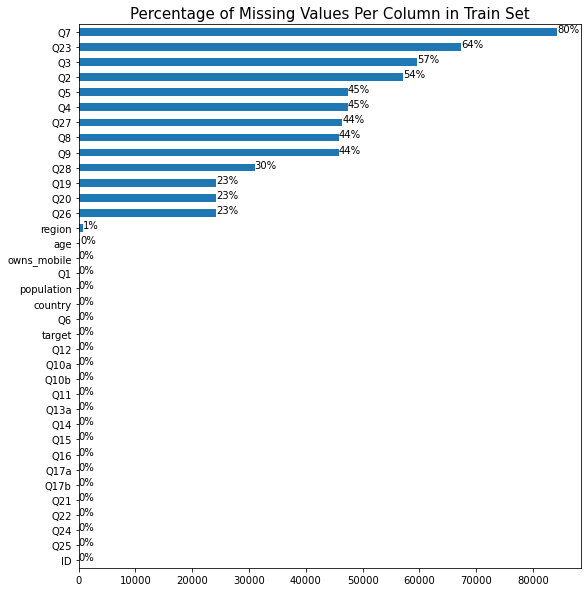

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

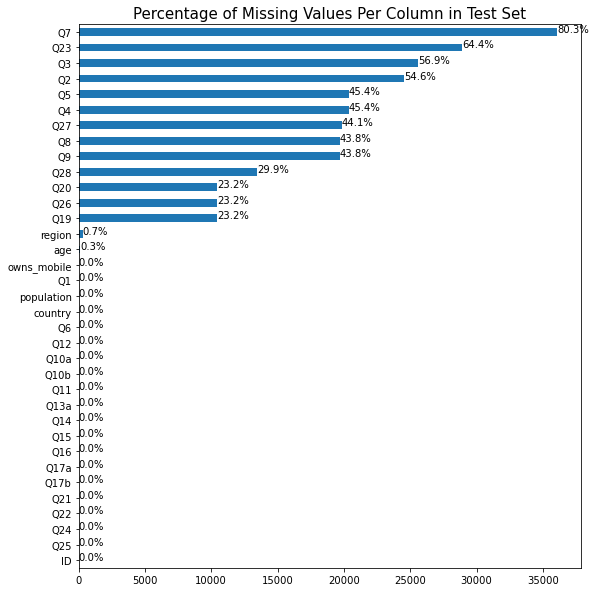

In [9]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

## Distribution of the target variable

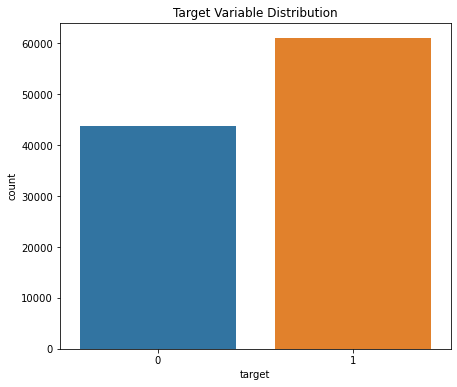

In [11]:
plt.figure(figsize=(7, 6))
sns.countplot(train.target)
plt.title('Target Variable Distribution');

This shows us that the target (Can you make a payment if you were in an emergency) is fairly balanced. The majority class in this dataset are people who can make a payment incase of an emergency

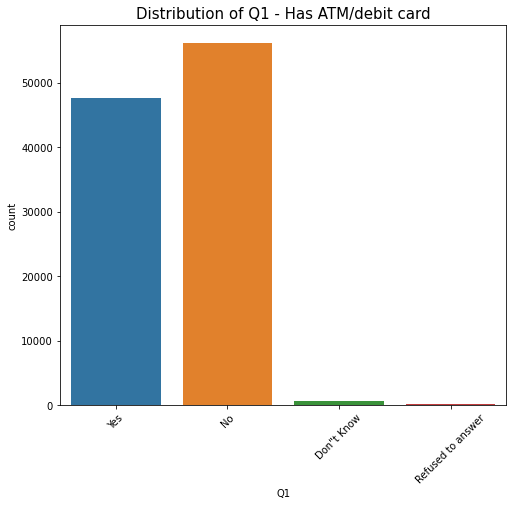

In [12]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(train.Q1)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q1 - Has ATM/debit card', fontdict = {'size': 15});

This shows that most people do not own a debit or ATM card

## Combine train and test set for easy preprocessing 

In [13]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 36)


In [14]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q2           68137 non-null   float64
 7   Q3           64562 non-null   float64
 8   Q4           82004 non-null   float64
 9   Q5           82004 non-null   float64
 10  Q6           149810 non-null  int64  
 11  Q7           29515 non-null   float64
 12  Q8           84272 non-null   float64
 13  Q9           84272 non-null   float64
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

In [15]:
# Category columns
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q2           68137 non-null   category
 7   Q3           64562 non-null   category
 8   Q4           82004 non-null   category
 9   Q5           82004 non-null   category
 10  Q6           149810 non-null  category
 11  Q7           29515 non-null   category
 12  Q8           84272 non-null   category
 13  Q9           84272 non-null   category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a

### Number of unique values per categorical column

In [16]:
# Check unique values for each categorical column
for col in cat_cols:
  print(col, all_data[col].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q2 4
Q3 4
Q4 4
Q5 4
Q6 4
Q7 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q23 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


## Fill in missing values
Missing values can be filled using different strategies
 - Mean
 - Max
 - Min
 - for categorical variables - mode
 - [sklearn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
 - Others... do more reasearch

In [17]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

### Feature Engineering
#### Try different strategies of dealing with categorical variables
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [18]:
# Shape of data before encoding
all_data.shape

(149810, 36)

In [19]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,25550170.0,66.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [20]:
# Shape of data after encoding
all_data.shape

(149810, 276)

In [21]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((104867, 276), (44943, 276))

### Training and making predictions

- Is lgbm the best model for this challenge?
- Parameter tuning
  - Grid search, random search, perhaps bayesian search works better...

In [22]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID', 'target'])
X = train_df[main_cols]
y = train_df.target.astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'RandomForest AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

RandomForest AUC score on the X_test is: 0.7597322869353524

              precision    recall  f1-score   support

           0       0.66      0.58      0.61     12994
           1       0.73      0.79      0.76     18467

    accuracy                           0.70     31461
   macro avg       0.69      0.68      0.68     31461
weighted avg       0.70      0.70      0.70     31461



### Train different model and compare results

In [26]:
# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

LightGBMError: Do not support special JSON characters in feature name.

- There is a light improvement when using LGBMClassifier

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

### Making predictions of the test set and creating a submission file

In [25]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict_proba(test_df)[:, 1]

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)
sub_file.head()

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************